In [ ]:
# 1. IMPORT ALL PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# 2. IMPORT DATASET (Car Evaluation Dataset)
# Make sure "car_evaluation.csv" is in your working directory.
df = pd.read_csv("/content/car_evaluation (2).csv")

In [ ]:
# 3. DISPLAY HEAD, TAIL, DESCRIBE, COLUMN NAMES, DATA SIZE & SHAPE
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nStatistical Description:")
print(df.describe())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Shape (rows, columns):")
print(df.shape)

print("\nData Size (total elements):")
print(df.size)

First 5 rows:
  buying  maint  doors  persons lug_boot safety outcome
0  vhigh  vhigh      2        2    small    low   unacc
1  vhigh  vhigh      2        2    small    med   unacc
2  vhigh  vhigh      2        2    small   high   unacc
3  vhigh  vhigh      2        2      med    low   unacc
4  vhigh  vhigh      2        2      med    med   unacc

Last 5 rows:
     buying maint  doors  persons lug_boot safety outcome
1723    low   low      5        5      med    med    good
1724    low   low      5        5      med   high   vgood
1725    low   low      5        5      big    low   unacc
1726    low   low      5        5      big    med    good
1727    low   low      5        5      big   high   vgood

Statistical Description:
             doors      persons
count  1728.000000  1728.000000
mean      3.500000     3.666667
std       1.118358     1.247580
min       2.000000     2.000000
25%       2.750000     2.000000
50%       3.500000     4.000000
75%       4.250000     5.000000
max   

In [ ]:
# 4. CHECK FOR NULL VALUES & REMOVE IF ANY, THEN CHECK & REMOVE DUPLICATES
print("\nChecking for Null Values:")
print(df.isnull().sum())

# If any null values exist, remove them (if needed uncomment the following line)
# df.dropna(inplace=True)

# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
# Remove duplicates if found
df.drop_duplicates(inplace=True)

print("\nData Shape after cleaning (rows, columns):", df.shape)

# 5. DISPLAY FEW STATISTICAL DATA (e.g., frequency counts of 'outcome')
print("\nFrequency count for 'outcome':")
print(df['outcome'].value_counts())

# 6. LABEL ENCODER FOR DATASET TO CONVERT CATEGORICAL VALUES TO NUMBERS
encoder = LabelEncoder()
# Applying encoding to each categorical column in features
df['buying'] = encoder.fit_transform(df['buying'])
df['maint'] = encoder.fit_transform(df['maint'])
df['doors'] = encoder.fit_transform(df['doors'])
df['persons'] = encoder.fit_transform(df['persons'])
df['lug_boot'] = encoder.fit_transform(df['lug_boot'])
df['safety'] = encoder.fit_transform(df['safety'])
# Optionally, you may also encode the target variable if required
df['outcome'] = encoder.fit_transform(df['outcome'])

print("\nDataset after Label Encoding:")
print(df.head())



Checking for Null Values:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

Number of Duplicates: 0

Data Shape after cleaning (rows, columns): (1728, 7)

Frequency count for 'outcome':
outcome
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Dataset after Label Encoding:
   buying  maint  doors  persons  lug_boot  safety  outcome
0       3      3      0        0         2       1        2
1       3      3      0        0         2       2        2
2       3      3      0        0         2       0        2
3       3      3      0        0         1       1        2
4       3      3      0        0         1       2        2


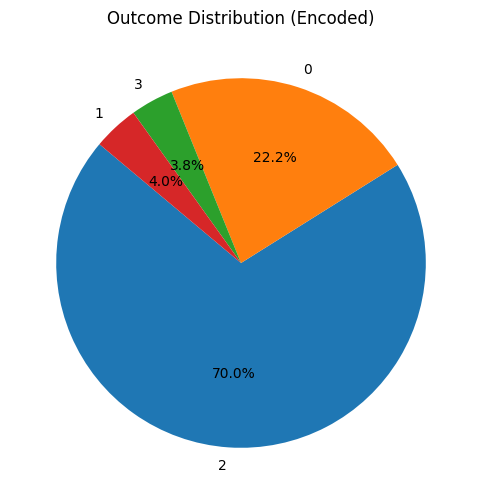

In [ ]:
# 7. EDA: Visualize the distribution of 'outcome' using a Pie Chart
#    using Counter from collections
outcome_counts = Counter(df['outcome'])
labels = list(outcome_counts.keys())
sizes = list(outcome_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Outcome Distribution (Encoded)")
plt.show()

# 8. DATA PREPROCESSING: SPLITTING THE DATA INTO FEATURES AND TARGET
X = df.drop('outcome', axis=1)  # All features
y = df['outcome']               # Target variable

# Split data into training and testing sets (default split, adjust test_size if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:

# 9. TRAIN THE MODEL & TEST ACCURACY
# Create a RandomForestClassifier with specified hyperparameters
model = RandomForestClassifier(n_estimators=25, max_depth=15, bootstrap=False, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, n_estimators=25,
                       random_state=42)

In [ ]:
# Predict on test data
predict = model.predict(X_test)
print("\nPredictions on Test Data:")
print(predict)

# 10. METRICS: CALCULATE ACCURACY, CLASSIFICATION REPORT & CONFUSION MATRIX
acc = accuracy_score(y_test, predict)
print("\nAccuracy Score:", acc)

print("\nClassification Report:")
print(classification_report(y_test, predict))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predict))


Predictions on Test Data:
[2 1 2 0 2 0 2 2 2 2 3 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 0 1
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 0 2 2 0 3 2 0 0 2 2 2 2 2
 1 3 2 2 2 2 3 2 2 0 3 0 2 0 1 0 2 1 2 2 2 1 2 2 2 0 2 2 2 2 1 1 0 2 2 0 2
 2 2 2 2 0 1 2 2 2 2 1 2 0 0 2 1 2 2 2 2 2 1 2 2 0 2 3 2 2 2 0 0 0 2 0 2 2
 2 2 1 3 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 3 0 2 0 2 2 0 2 2 2 2 0 2 2 2 1
 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 1 2 2 2 2 0 2 2 1 2 2 2 3 3 2
 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 2 0 3 2 2 2 0 2 2 3 2 2 0 0 2 0 2 0 0 2 2 0 1 3 0 0 2 2 2 2 3
 0 0 2 2 2 2 3 2 2 2 2 0 2 2 3 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 3 2 2 2 2 0 2 0 2 2 2 0
 2 0 1 3 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 3 2 0 2 2 0 0 2 3 2 0 2 1 2 0 0 2 2 2 2 0 2 1 2]

Accuracy Score: 0.9652777777777778

Classification Report:
              precision    recall  f

In [ ]:
# Splitting features and target for the Car Evaluation dataset.
X_car = df.drop('outcome', axis=1)
y_car = df['outcome']

# Initialize the RandomForestClassifier for the Car Evaluation dataset.
model_car = RandomForestClassifier()

# Define a dictionary of hyperparameters to search.
parameters_car = {
    'max_depth': [5, 10, 15, 20, 25],
    'random_state': [0, 1, 2],
    'n_estimators': [10, 30, 50, 70, 100]
}

# Using GridSearchCV for hyperparameter tuning on the Car Evaluation dataset.
grid_car = GridSearchCV(model_car, parameters_car, cv=5, verbose=1)
grid_car.fit(X_car, y_car)

print("\n[Car Evaluation] Best Score from GridSearchCV:")
print(grid_car.best_score_)

print("\n[Car Evaluation] Best Hyperparameters from GridSearchCV:")
print(grid_car.best_params_)

# You can further refine the tuning process for the Car Evaluation dataset just as we did with the Breast Cancer dataset.
# For example, a second round of tuning with a narrower range:
parameters_car = {
    'max_depth': [10, 11, 12],
    'random_state': [2],
    'n_estimators': [65, 70, 75]
}
grid_car = GridSearchCV(model_car, parameters_car, cv=5, verbose=1)
grid_car.fit(X_car, y_car)
print("\n[Car Evaluation - Second Round] Best Score:", grid_car.best_score_)
print("[Car Evaluation - Second Round] Best Parameters:", grid_car.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits

[Car Evaluation] Best Score from GridSearchCV:
0.8218296054284997

[Car Evaluation] Best Hyperparameters from GridSearchCV:
{'max_depth': 15, 'n_estimators': 50, 'random_state': 1}
Fitting 5 folds for each of 9 candidates, totalling 45 fits

[Car Evaluation - Second Round] Best Score: 0.7986914635167965
[Car Evaluation - Second Round] Best Parameters: {'max_depth': 10, 'n_estimators': 75, 'random_state': 2}


EXPERIMENTx10

In [ ]:
# 1. IMPORT ALL PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# 2. IMPORT DATASET
data = pd.read_csv('/content/iris (2).csv')

In [ ]:
# 3. DISPLAY HEAD, INFO, UNIQUE TARGETS, SHAPE, NULL CHECK, AND DESCRIBE
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
data.info()

print("\nUnique values in target:")
print(data.target.unique())

print("\nDataset Shape (rows, columns):", data.shape)

# Check for null values and drop them if any
print("\nChecking for null values:")
print(data.isnull().sum())
data.dropna(inplace=True)
print("Dataset shape after dropping nulls:", data.shape)

# Check for duplicates and drop them if any
print("\nChecking for duplicate rows:")
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Dataset shape after dropping duplicates:", data.shape)

print("\nStatistical Description:")
print(data.describe())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Unique values in target:
[0 1 2]

Dataset Shape (rows, columns): (150, 5)

Checking for null values:
sepal_le


Counts for each target type: Counter({1: 50, 2: 49, 0: 48})


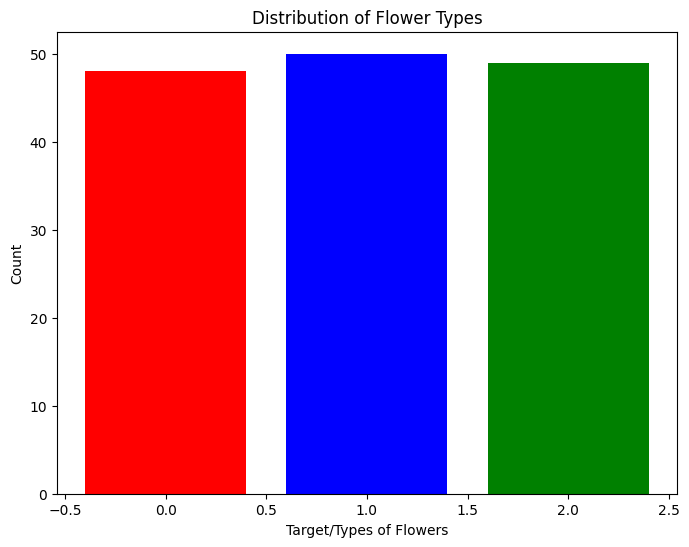

In [ ]:
# 4. EDA: Visualize Distribution of Target using a Bar Graph (using collections.Counter)
target_counts = Counter(data['target'])
print("\nCounts for each target type:", target_counts)

plt.figure(figsize=(8,6))
plt.bar(target_counts.keys(), target_counts.values(), color=['red','blue','green'])
plt.xlabel('Target/Types of Flowers')
plt.ylabel('Count')
plt.title('Distribution of Flower Types')
plt.show()


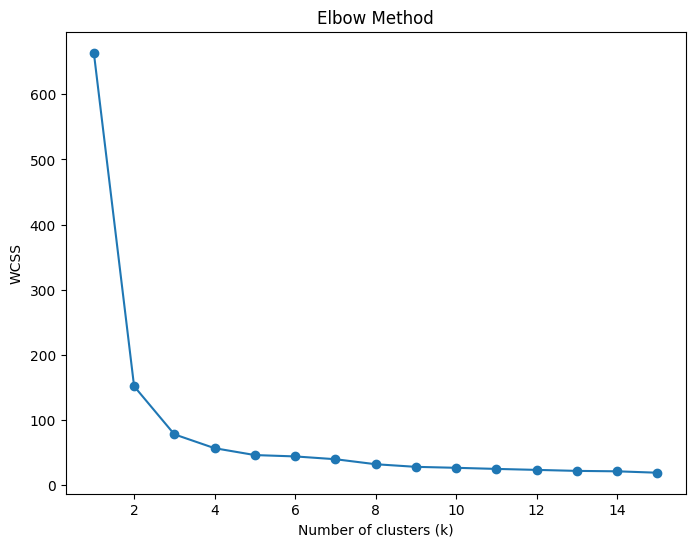

In [ ]:
# 5. DATA PREPROCESSING: SPLITTING FEATURES AND TARGET
# Here, x contains the features (all four measurements) and target is used only for EDA comparison.
x = data.iloc[:, [0, 1, 2, 3]].values

# 6. FINDING THE NUMBER OF CLUSTERS (K) USING THE ELBOW METHOD
wcss = []  # List to hold Within-Cluster Sum of Squares for different k values
for i in range(1, 16):  # testing k values from 1 to 15
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 16), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# 7. BUILDING THE K-MEANS MODEL
# Let's start with k = 3 (commonly used for Iris) and then try k = 4 for comparison.
kmeans = KMeans(n_clusters=3, random_state=1)
y_predict = kmeans.fit_predict(x)
print("\nCluster labels for k=3:")
print(y_predict)



Cluster labels for k=3:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2]


In [ ]:
kmeans1 = KMeans(n_clusters=4, random_state=1)
y_predict1 = kmeans1.fit_predict(x)
print("\nCluster labels for k=4:")
print(y_predict1)


Cluster labels for k=4:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0 0 0
 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0 0 3
 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 0 3 0]


In [ ]:
# 8. EVALUATING THE MODEL USING SILHOUETTE SCORE
sil_score_3 = silhouette_score(x, kmeans.labels_)
print("\nSilhouette Score for k=3:", sil_score_3)


Silhouette Score for k=3: 0.5493074238267263


In [ ]:
sil_score_4 = silhouette_score(x, kmeans1.labels_)
print("Silhouette Score for k=4:", sil_score_4)

Silhouette Score for k=4: 0.49397403978627596


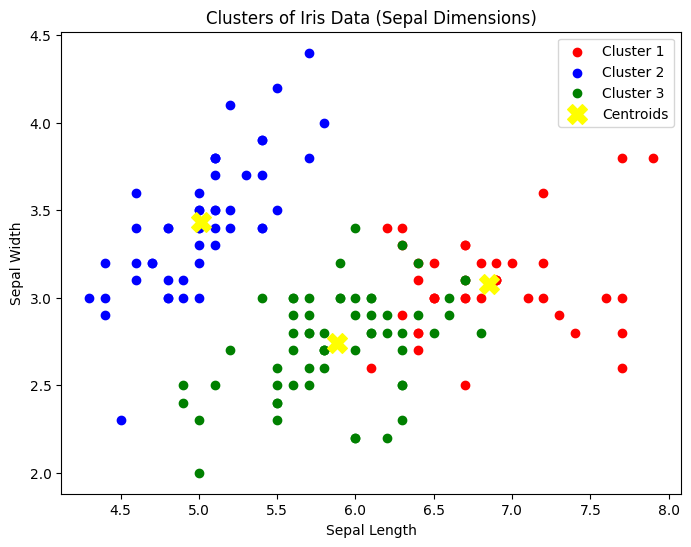

In [ ]:
# 9. VISUALIZING THE CLUSTERS WITH CENTROIDS
# First visualization: Using Sepal Length (x[:,0]) and Sepal Width (x[:,1])
plt.figure(figsize=(8,6))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], c='red', label='Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], c='blue', label='Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow',
            label='Centroids', marker='X', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters of Iris Data (Sepal Dimensions)')
plt.legend()
plt.show()

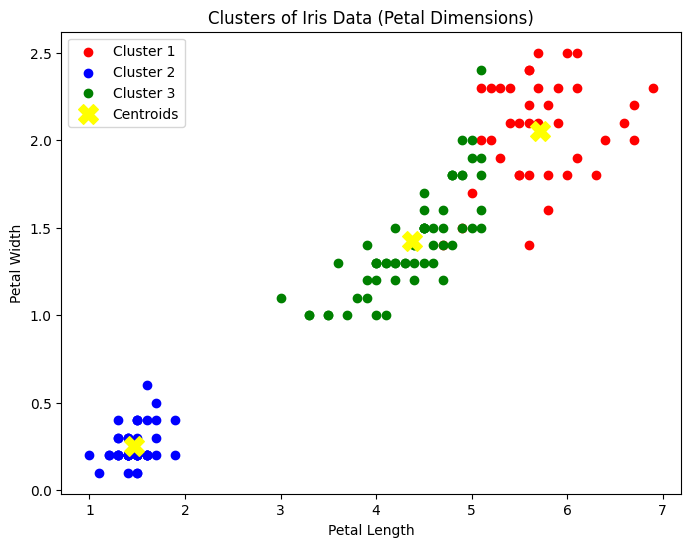

In [ ]:
# Second visualization: Using Petal Length (x[:,2]) and Petal Width (x[:,3])
plt.figure(figsize=(8,6))
plt.scatter(x[y_predict == 0, 2], x[y_predict == 0, 3], c='red', label='Cluster 1')
plt.scatter(x[y_predict == 1, 2], x[y_predict == 1, 3], c='blue', label='Cluster 2')
plt.scatter(x[y_predict == 2, 2], x[y_predict == 2, 3], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='yellow',
            label='Centroids', marker='X', s=200)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clusters of Iris Data (Petal Dimensions)')
plt.legend()
plt.show()